In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [3]:
dfbv = pd.read_pickle('bit_price&vader_firstclean.pkl')

In [4]:
dfbv

dfbv = dfbv.drop(columns = ['unix', 'symbol', 'pos', 'neu', 'neg'])

In [9]:
# The dataset contains all price related variables for Bitcoin and the average compound sentiment score for that day

dfbv


,open,high,low,close,Volume BTC,Volume USD,compound
2022-05-01,37638.78,38672.20,37400.00,38488.34,1248.042690,4.803509e+07,0.126698
2022-04-30,38599.30,38786.95,37597.36,37639.80,728.279620,2.741230e+07,0.118325
2022-04-29,39753.28,39923.61,38174.27,38593.42,1600.899167,6.178417e+07,0.130839
2022-04-28,39254.40,40387.00,38880.44,39754.20,1842.005084,7.322744e+07,0.139122
2022-04-27,38105.68,39494.73,37885.75,39256.05,1769.009307,6.944432e+07,0.141789
2022-04-26,40452.52,40800.00,37701.00,38137.67,2909.722520,1.109700e+08,0.150431
2022-04-25,39464.67,40602.85,38202.91,40441.11,2220.044028,8.978104e+07,0.139021
2022-04-24,39438.51,39944.65,38987.00,39467.40,663.704172,2.619468e+07,0.168375
2022-04-23,39700.55,39983.98,39301.00,39421.59,398.244488,1.569943e+07,0.155180
2022-04-22,40497.00,40808.66,39197.64,39726.03,2136.999771,8.489452e+07,0.139239


In [20]:
dfbv=dfbv.sort_index(ascending=True)

In [21]:
dfbv

,open,high,low,close,Volume BTC,Volume USD,compound
2022-03-25,44025.99,45137.12,43616.88,44320.60,1725.071570,7.645621e+07,0.076815
2022-03-26,44340.49,44815.31,44101.00,44535.65,494.724202,2.203286e+07,0.044558
2022-03-27,44553.24,46950.00,44456.90,46864.39,1548.888905,7.258773e+07,0.067313
2022-03-28,46854.96,48234.00,46672.25,47152.38,2691.937848,1.269313e+08,0.121951
2022-03-29,47152.38,48128.87,46941.84,47459.03,1716.323923,8.145507e+07,0.104992
2022-03-30,47459.03,47721.41,46572.15,47068.08,1627.543218,7.660533e+07,0.108095
2022-03-31,47086.07,47624.18,45234.00,45517.27,1372.965107,6.249362e+07,0.117222
2022-04-01,45522.53,46739.81,44244.00,46307.81,1953.219529,9.044932e+07,0.111855
2022-04-02,46306.38,47218.17,45650.00,45820.28,724.308750,3.318803e+07,0.120900
2022-04-03,45820.28,47458.48,45565.64,46401.57,1063.628732,4.935404e+07,0.132246


In [22]:
#Scaling the data
scaler = MinMaxScaler()
scaler = scaler.fit(dfbv)
dfsc = scaler.transform(dfbv)

In [23]:
dfsc

array([[0.65041216, 0.67611956, 0.65153891, 0.68037922, 0.50200529,
        0.52282987, 0.25604352],
       [0.68243782, 0.64246376, 0.70227545, 0.70228012, 0.04763886,
        0.0615293 , 0.        ],
       [0.70410224, 0.86571566, 0.73957434, 0.93944128, 0.43694116,
        0.4900401 , 0.18061735],
       [0.93848731, 1.        , 0.97174654, 0.96877046, 0.85906835,
        0.95066427, 0.61431414],
       [0.96877371, 0.98900521, 1.        , 1.        , 0.49877479,
        0.56520099, 0.47969732],
       [1.        , 0.94639189, 0.9612559 , 0.96018527, 0.46598814,
        0.5240939 , 0.50433034],
       [0.96202133, 0.93622331, 0.82101565, 0.80224926, 0.37197262,
        0.40448088, 0.57677945],
       [0.80280543, 0.8437334 , 0.71726208, 0.88275863, 0.58626018,
        0.64143763, 0.53417922],
       [0.88262519, 0.89376163, 0.86461311, 0.8331081 , 0.13242427,
        0.15608219, 0.60597394],
       [0.83312543, 0.91889393, 0.85577205, 0.89230724, 0.25773491,
        0.29310779, 0.6

In [24]:
#So far I've only experimented with different window sizes and the differences are significant -best size is 3. Larger sizes decrease performance
window_size = 3
X=[]
y=[]

for i in range(len(dfsc)-window_size):
    row = [r for r in dfsc[i:i+window_size]]
    X.append(row)
    label = dfsc[i+window_size][3]
    y.append(label)


X = np.array(X)
y = np.array(y)

In [25]:
print(X.shape)
print(y.shape)

(35, 3, 7)
(35,)


In [28]:
X

array([[[0.65041216, 0.67611956, 0.65153891, 0.68037922, 0.50200529,
         0.52282987, 0.25604352],
        [0.68243782, 0.64246376, 0.70227545, 0.70228012, 0.04763886,
         0.0615293 , 0.        ],
        [0.70410224, 0.86571566, 0.73957434, 0.93944128, 0.43694116,
         0.4900401 , 0.18061735]],

       [[0.68243782, 0.64246376, 0.70227545, 0.70228012, 0.04763886,
         0.0615293 , 0.        ],
        [0.70410224, 0.86571566, 0.73957434, 0.93944128, 0.43694116,
         0.4900401 , 0.18061735],
        [0.93848731, 1.        , 0.97174654, 0.96877046, 0.85906835,
         0.95066427, 0.61431414]],

       [[0.70410224, 0.86571566, 0.73957434, 0.93944128, 0.43694116,
         0.4900401 , 0.18061735],
        [0.93848731, 1.        , 0.97174654, 0.96877046, 0.85906835,
         0.95066427, 0.61431414],
        [0.96877371, 0.98900521, 1.        , 1.        , 0.49877479,
         0.56520099, 0.47969732]],

       [[0.93848731, 1.        , 0.97174654, 0.96877046, 0.85906835

In [29]:
y

array([0.96877046, 1.        , 0.96018527, 0.80224926, 0.88275863,
       0.8331081 , 0.89230724, 0.91233223, 0.80076849, 0.56539973,
       0.5921778 , 0.47359212, 0.52224971, 0.45767845, 0.19197636,
       0.2502905 , 0.35725205, 0.23644726, 0.29771988, 0.2806605 ,
       0.20892371, 0.32332474, 0.39371417, 0.38048299, 0.28830774,
       0.21246371, 0.18145924, 0.18612457, 0.28528815, 0.05070357,
       0.16460048, 0.21533257, 0.09711759, 0.        , 0.08641614])

In [30]:
# Train-test & validation split
X_train, y_train = X[:20], y[:20]
X_val, y_val = X[20:25], y[20:25]
X_test, y_test = X[25:], y[25:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20, 3, 7), (20,), (5, 3, 7), (5,), (10, 3, 7), (10,))

In [31]:
model4 = Sequential()
model4.add(InputLayer((3, 7)))  # 3 time steps 7 vars
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18432     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,961
Trainable params: 18,961
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
2/2 [==============================] - 1s 266ms/step - loss: 0.2209 - root_mean_squared_error: 0.4700 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2177
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2084 - root_mean_squared_error: 0.4565 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2112
Epoch 3/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1961 - root_mean_squared_error: 0.4428 - val_loss: 0.0421 - val_root_mean_squared_error: 0.2051
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1852 - root_mean_squared_error: 0.4303 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1990
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1744 - root_mean_squared_error: 0.4176 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1935
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 0.1639 - root_mean_squared_error: 0.4049 - val_loss: 0.0354 - val_root_mean_sq

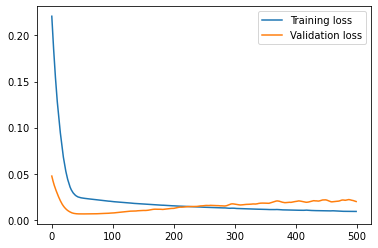

In [32]:
 #fit the model
history = model4.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_val,y_val), verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [33]:
# Training data predictions & plot
train_predictions = model4.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

1/1 [==============================] - 0s 219ms/step


,Train Predictions,Actuals
0,0.836083,0.968770
1,0.939627,1.000000
2,0.970293,0.960185
3,0.951518,0.802249
4,0.913666,0.882759
5,0.841741,0.833108
6,0.797552,0.892307
7,0.794113,0.912332
8,0.782344,0.800768
9,0.754161,0.565400


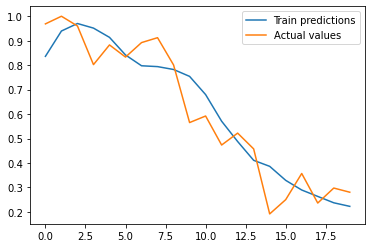

In [34]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'], label='Train predictions')
plt.plot(train_results['Actuals'], label='Actual values')
plt.legend()

In [35]:
#Validation data predictions & plot
val_predictions = model4.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

1/1 [==============================] - 0s 16ms/step


,Val Predictions,Actuals
0,0.193413,0.208924
1,0.163404,0.323325
2,0.178682,0.393714
3,0.219203,0.380483
4,0.259965,0.288308


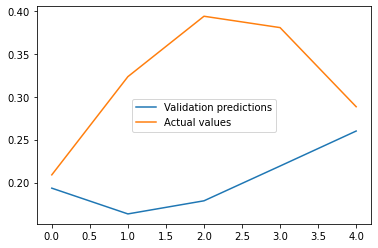

In [36]:
plt.plot(val_results['Val Predictions'], label='Validation predictions')
plt.plot(val_results['Actuals'], label='Actual values')
plt.legend()

In [37]:
# Test data predictions & plot
test_predictions = model4.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

1/1 [==============================] - 0s 16ms/step


,Test Predictions,Actuals
0,0.248173,0.212464
1,0.234044,0.181459
2,0.174486,0.186125
3,0.128370,0.285288
4,0.125484,0.050704
5,0.128936,0.164600
6,0.134957,0.215333
7,0.131423,0.097118
8,0.118427,0.000000
9,0.093969,0.086416


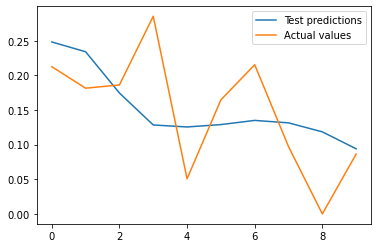

In [38]:
plt.plot(test_results['Test Predictions'], label='Test predictions')
plt.plot(test_results['Actuals'], label='Actual values')
plt.legend()

In [39]:
from sklearn.metrics import mean_squared_error as mse
# Function to return df with predicted vs actual, mse & plot
def plot_predictions1(model, X, y, start=0, end=38):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

1/1 [==============================] - 0s 16ms/step


(   Predictions   Actuals
 0     0.193413  0.208924
 1     0.163404  0.323325
 2     0.178682  0.393714
 3     0.219203  0.380483
 4     0.259965  0.288308,
 0.019773652302561586)

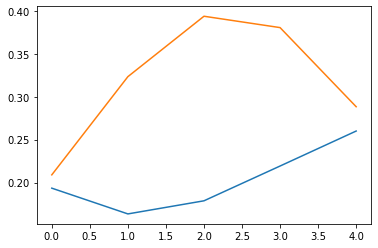

In [40]:
plot_predictions1(model4, X_val, y_val)


1/1 [==============================] - 0s 16ms/step


(   Predictions   Actuals
 0     0.248173  0.212464
 1     0.234044  0.181459
 2     0.174486  0.186125
 3     0.128370  0.285288
 4     0.125484  0.050704
 5     0.128936  0.164600
 6     0.134957  0.215333
 7     0.131423  0.097118
 8     0.118427  0.000000
 9     0.093969  0.086416,
 0.005738239821564019)

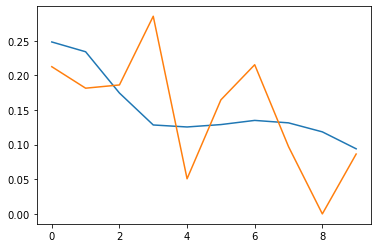

In [42]:
plot_predictions1(model4, X_test, y_test)

In [50]:

# mse, mae for training data
print('MSE: ', mean_squared_error(y_train, train_predictions))
print('MAE: ', mean_absolute_error(y_train, train_predictions))

MSE:  0.009019585688427475
MAE:  0.07820208028296202


In [52]:
# mse, mae for testing data
print('MSE: ', mean_squared_error(y_test, test_predictions))
print('MAE: ', mean_absolute_error(y_test, test_predictions))

MSE:  0.005738239821564019
MAE:  0.0607957035689227


In [48]:
# mse, mae for validation data
print('MSE: ', mean_squared_error(y_val, val_predictions))
print('MAE: ', mean_absolute_error(y_val, val_predictions))

MSE:  0.019773652302561586
MAE:  0.11601701411547287


In [46]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [47]:
MAPE(y_test,test_predictions)

C:\Users\dayan\AppData\Local\Temp/ipykernel_3996/3631455597.py:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100


inf